In [43]:
import pandas as pd
import numpy as np
import folium

from folium import plugins
from folium.plugins import HeatMap 

import matplotlib.pyplot as plt


## 1. Data Cleaning

Here, we will be using data on crime provided by the police department of New York City, linked [here](https://www1.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page). At this link, you can find additional information regarding not only arrests, but also data regarding court summons, shootings, and complaints.

At the link above, you can find crime data dating back to 2013, yet I chose to focus on this most recent year for analysis. This is for a few reasons, mainly that it greatly minimized the number of datapoints and allowed for easier data analysis. I also noticed that upon preliminary inspection, older data seemed to be patchier and just generally worse to work with. Furthermore, I wasn't planning on analyzing the time element to these datasets, so I wouldn't need a wide range of dates for effective analysis.

This is an example of the data from the start. It contains ~100,000 data points regarding specific arrests made in New York City over the past year. These data points include information about the crime itself, the perpetrator's age, race, sex, and the location of the crime. 

In [44]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


As you can see, not much cleaning should be needed here. I mostly would like to first drop some columns I don't plan on using going forward

In [45]:
df = df.drop(columns=["ARREST_KEY", "PD_CD", "PD_DESC", "LAW_CODE", "ARREST_PRECINCT", 
                      "X_COORD_CD", "Y_COORD_CD", "New Georeferenced Column"])

df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,09/29/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,BLACK,40.826189,-73.909738
1,09/27/2021,104.0,RAPE,F,K,0,25-44,M,BLACK,40.674583,-73.930222
2,09/25/2021,106.0,FELONY ASSAULT,F,Q,0,25-44,M,BLACK,40.603441,-73.765986
3,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.837782,-73.919458
4,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.835990,-73.916276


Here, I drop the null entries of the database. I don't think I have any shortage of data, so I don't see the need to try and salvage these rows going forward.

In [46]:
df = df.dropna()

df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,09/29/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,BLACK,40.826189,-73.909738
1,09/27/2021,104.0,RAPE,F,K,0,25-44,M,BLACK,40.674583,-73.930222
2,09/25/2021,106.0,FELONY ASSAULT,F,Q,0,25-44,M,BLACK,40.603441,-73.765986
3,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.837782,-73.919458
4,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.835990,-73.916276


Here, we just make sure we're working with floats for later.

In [47]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 2. Data Analysis and Visualization

First, I just want to get an idea of what offenses are listed within this dataset so I know what to look for in the future. I did this by taking all unique values of offenses listed and printing them.

In [48]:
offenses = set(df['OFNS_DESC'])

print(offenses)

{'NYS LAWS-UNCLASSIFIED FELONY', 'GRAND LARCENY', 'FRAUDS', 'PARKING OFFENSES', 'FELONY ASSAULT', 'BURGLARY', 'UNAUTHORIZED USE OF A VEHICLE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'THEFT OF SERVICES', 'MURDER & NON-NEGL. MANSLAUGHTE', 'OFFENSES AGAINST PUBLIC SAFETY', 'DANGEROUS DRUGS', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'OTHER STATE LAWS (NON PENAL LA', 'JOSTLING', 'NEW YORK CITY HEALTH CODE', 'ROBBERY', 'DANGEROUS WEAPONS', 'ANTICIPATORY OFFENSES', 'OFFENSES AGAINST PUBLIC ADMINI', 'PETIT LARCENY', 'PROSTITUTION & RELATED OFFENSES', 'KIDNAPPING & RELATED OFFENSES', 'OTHER TRAFFIC INFRACTION', 'OFFENSES INVOLVING FRAUD', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'HARRASSMENT 2', 'FELONY SEX CRIMES', 'ARSON', 'GAMBLING', 'OFF. AGNST PUB ORD SENSBLTY &', 'OTHER OFFENSES RELATED TO THEF', 'LOITERING/GAMBLING (CARDS, DIC', 'OFFENSES RELATED TO CHILDREN', 'SEX CRIMES', 'INTOXICATED & IMPAIRED DRIVING', 'ADMINISTRATIVE CODES', 'VEHICLE AND TRAFFIC LAWS', 'ENDAN WELFARE INCOMP', 'CRIMINAL MISCHIEF

Next, we set up a starting heatmap just to get an idea of how crimes are distributed throughout the boroughs of New York City. I chose to sample only a percent of the total dataset as not to oversaturate the heatmap's data.

In [49]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)

heat_df = df.sample(frac=.01)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Crime in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

From this map, we can get a decent idea of how crimes are distributed throughout NYC. We notice a significantly lower amount of arrests made in Staten Island compared to the other boroughs. It would require further investigation to see whether or not this is due entirely to its lower population, or other factors like the higher GDP per capita of its citizens than the other boroughs.

The following three heatmaps are meant to investigate the effect of location on the severity of arrests made. The categories each arrest is assigned to are violations, misdemeanors, and felonies in order of increasing severity.

We choose to sample a limited amount of points from each category such that the heatmaps are not overly affected by the differing proportions of violations vs. misdemeanors vs. felonies

In [50]:
# the number of arrests we choose to sample for the below heatmaps
heatmap_ss = 250

In [51]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'V'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Violations Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

In [52]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'M'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Misdemeanors Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

In [53]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'F'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Felonies Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

The most surprising difference I found here was the increasing representation of Staten Island in misdemeanors and felonies over violations. My intuition was that the generally higher economic standing of its residents would lead to most of its crimes being less severe. I hypothesize this could be due to the lowered police presence in Staten Island - police come there on calls to control more serious offenses, but are less likely to naturally be in the area to arrest for simple violations. I have no means of testing this hypothesis in particular, but more in-depth investigation is made into discrepancies in arrests between the boroughs of NYC below.

Here, I sourced the populations of each individual borough just through simple Google search, and median household incomes from [this table](https://www.baruch.cuny.edu/nycdata/income-taxes/med_hhold_income.htm). I used them for plotting below.

In [54]:
populations = {
    "Bronx": 1435000,
    "Brooklyn": 2590000,
    "Manhattan": 1632000,
    "Queens": 2287000,
    "Staten Island": 474000
}

med_household_inc = {
    "Bronx": 37379,
    "Brooklyn": 56942,
    "Manhattan": 85071,
    "Queens": 64509,
    "Staten Island": 79201
}

labels = ['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island']

populations = pd.Series(populations)
med_household_inc = pd.Series(med_household_inc)
populations

Bronx            1435000
Brooklyn         2590000
Manhattan        1632000
Queens           2287000
Staten Island     474000
dtype: int64

Now, I choose to look into how these arrests are distributed by borough. I though a pie chart would be the best way to represent this visually, since we're just looking for the percentage of total arrests that occured in each borough. I decided to compare this side by side with a similar pie chart depicting the population of each borough, so we can get an idea of which boroughs are under/overrepresented in arrests.

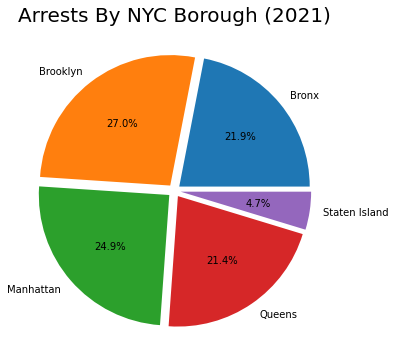

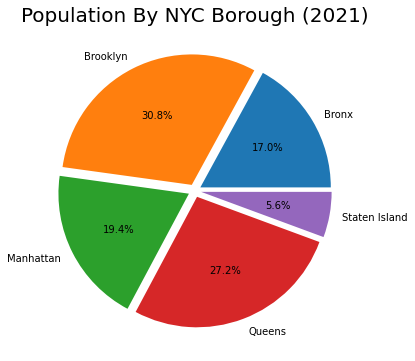

In [55]:
borough_dist = df.groupby('ARREST_BORO').count()['KY_CD']

plt.figure(figsize=(6,6))
plt.title('Arrests By NYC Borough (2021)', fontsize=20)
plt.pie(borough_dist, explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(6,6))
plt.title('Population By NYC Borough (2021)', fontsize=20)
plt.pie(populations, explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%')
plt.show()

Drawing a pie chart of the population next to the arrests pie chart helps us understand the relation between the population of each borough and its portion of arrests. From this, we see that the boroughs of The Bronx and Manhattan are overrepresented in arrests, while Queens and Brooklyn are underrepresented. We see that Staten Island is just about normally represented for its population. Below we look further into the possible reasons for this.

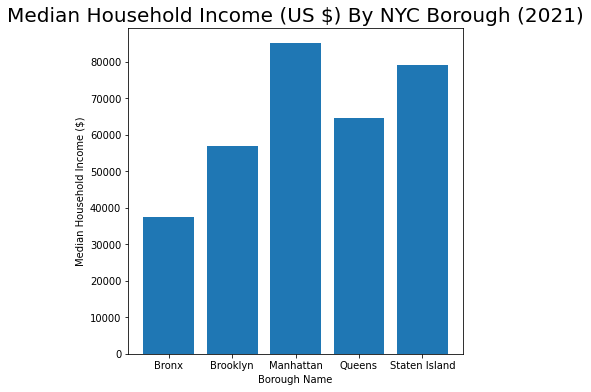

In [56]:
plt.figure(figsize=(6,6))
plt.title('Median Household Income (US $) By NYC Borough (2021)', fontsize=20)
plt.bar(labels, med_household_inc)
plt.ylabel("Median Household Income ($)")
plt.xlabel("Borough Name")
plt.show()

Looking at the median household income for each borough, we see that it doesn't offer much of an explanation for the data above. Despite having the highest household income by a decent margin, Manhattan is the most criminally overrepresented bureau- making up 19.4% of the population yet contributing to 24.9% of the arrests.

Now, we look into what types of arrests are occuring in each borough in search of a better explanation.

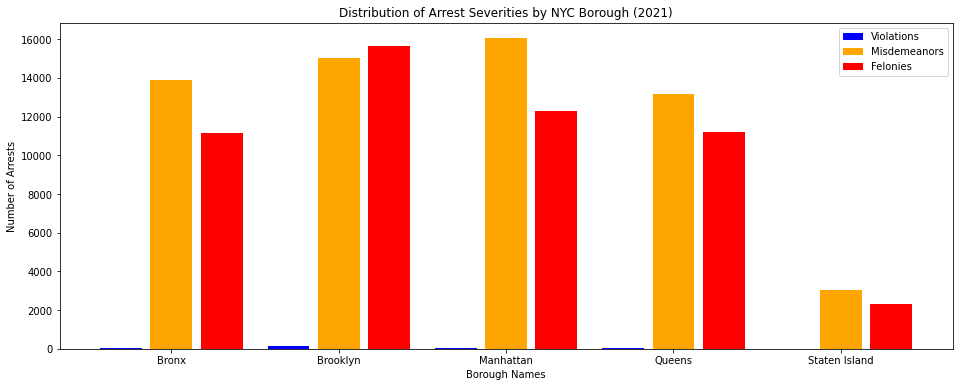

In [68]:
df_bronx = df[df['ARREST_BORO'] == 'B']
df_brook = df[df['ARREST_BORO'] == 'K']
df_manhat = df[df['ARREST_BORO'] == 'M']
df_queens = df[df['ARREST_BORO'] == 'Q']
df_staten = df[df['ARREST_BORO'] == 'S']

borough_dfs = [df_bronx, df_brook, df_manhat, df_queens, df_staten]

crimes = []

for borough in borough_dfs:
  violations = len(borough[borough['LAW_CAT_CD'] == 'V'])
  misdemeanors = len(borough[borough['LAW_CAT_CD'] == 'M'])
  felonies = len(borough[borough['LAW_CAT_CD'] == 'F'])

  crimes.append((violations, misdemeanors, felonies))

plt.figure(figsize=(16,6))
  
X_axis = np.arange(len(labels))

V = [crime[0] for crime in crimes]
M = [crime[1] for crime in crimes]
F = [crime[2] for crime in crimes]
  
plt.bar(X_axis - 0.3, V, 0.25, label = 'Violations', color='b')
plt.bar(X_axis, M, 0.25, label = 'Misdemeanors', color='orange')
plt.bar(X_axis + 0.3, F, 0.25, label = 'Felonies', color='r')

  
plt.xticks(X_axis, labels)
plt.xlabel("Borough Names")
plt.ylabel("Number of Arrests")
plt.title("Distribution of Arrest Severities by NYC Borough (2021)")
plt.legend()
plt.show()


This chart helps us understand why Manhattan and the Bronx were so overrepresented in their arrests compared to the other boroughs. More so than other boroughs, they have a high ratio of misdemeanor to felony arrests. From this we can see that although Manhattan and the Bronx have a higher volume of arrests for their population, other boroughs tend to have arrests for more severe crimes.

## 3. Machine Learning